In [162]:
#Biblitecas que irei usar nestas analises
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift
import scipy.cluster.hierarchy as sch

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.neighbors import NearestNeighbors






In [163]:
#DATAFRAME
df = pd.read_csv(r"C:\Users\Shiry\OneDrive\Área de Trabalho\projeto 7\data.csv", sep=',', encoding='ISO-8859-1')
df.head(40)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [164]:
#Colentando informações sobre os dados , tipo , dados nulos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [165]:
#retirando dados nulos
df = df.dropna()

In [166]:
#verificando
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [167]:
#analisando as estatisca descritiva
#Ja notei valores negativos em quantidade que irei fazer a dropagem mais a frente
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [168]:
#verificando e contabilizando os valores faltantes
df.isna().sum()
     

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [169]:
#Por algum motivo nao consigo fazer a a seleção dos valores abaixo de zero sem transforma a coluna , por tanto  irei transformar  e ja selecionar
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df = df[~(df['Quantity'] < 0)]
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [171]:
#ajustando coluna de data e excluindo o horario
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')  
df['InvoiceDate'] = df['InvoiceDate'].dt.date  

print(df)



       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

       InvoiceDate  UnitPrice  CustomerID         Country  
0       2010-12

In [172]:
#somando duplicados
df.duplicated().sum()


5193

Não excluirei o valores duplicados deste dataframe , o custumerId pode comprar em pontos diferentes o mesmo produto para reuso entendo que a exclusão desse valor pode comprementer a quantidade exata que um custormeID comprou em determinado tempo e sua quantidade 

<Axes: >

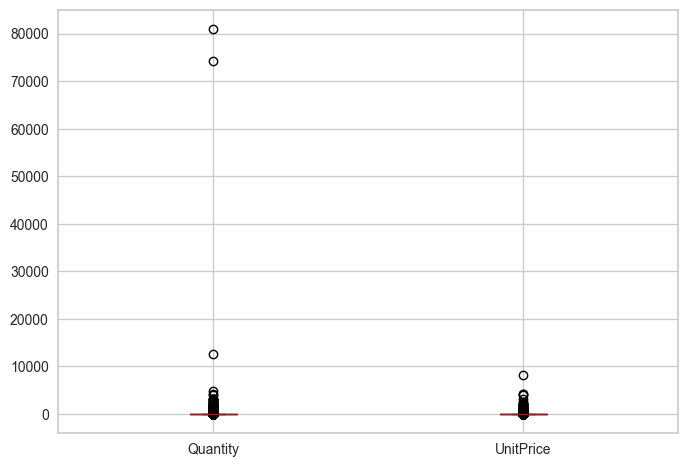

In [173]:
#Analises de outliers
df[["Quantity",'UnitPrice']].plot.box()

In [174]:
#Função de interquartil range
def is_outlier(array, extreme=False):

  q1,q3 = np.quantile(array, [.25,.75])
  iqr = q3-q1

  factor = 1.5 if extreme else 1.5
  upper_outlier = q3 + factor*iqr
  lower_outlier = q1 - factor*iqr

  return (array < lower_outlier) | (array > upper_outlier)

In [175]:

#contando os out liers na coluna quantidade
is_outlier(df.Quantity ).sum()

25656

In [176]:
#contando os out liers na coluna Preco_unit
is_outlier(df.UnitPrice).sum()

34356

In [177]:
#Aplicando a função de outiers
outliers_preco_unit = is_outlier(df['UnitPrice'])
outliers_quantidade = is_outlier(df['Quantity'])

In [178]:
#linha a linha
outlier_rows = df[outliers_preco_unit | outliers_quantidade]

In [179]:
# Removendo as linhas em que 'Quantidade' é superior a 10000 e 'Preco_unit' é superior a 5000
df_clean = df[(df['Quantity'] <= 10000) & (df['UnitPrice'] <= 5000)]

#novo data set

print(df_clean)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

       InvoiceDate  UnitPrice  CustomerID         Country  
0       2010-12

<Axes: >

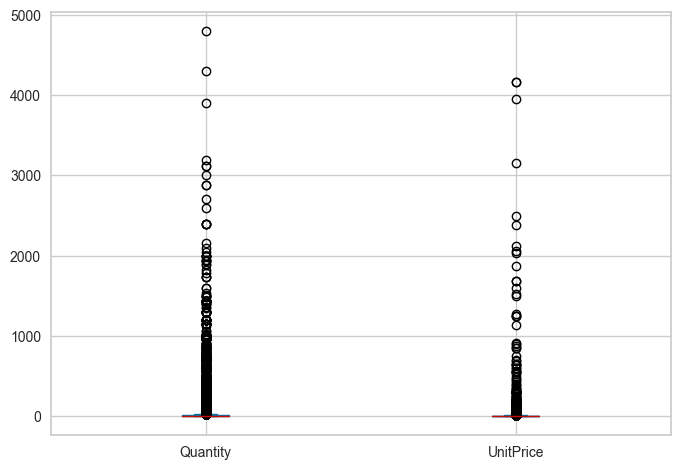

In [180]:
#verficando
df_clean[["Quantity","UnitPrice"]].plot.box()


In [181]:
#colentando ultima data
data_final= df_clean['InvoiceDate'].max()

In [182]:
#criando coluna amount que vai servir para o proximo  de RFM
df_clean = df_clean.assign(amount=df_clean['Quantity'] * df_clean['UnitPrice'])


In [183]:
df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60


In [184]:
# Definir a data mais recente no DataFrame
data_final = df_clean['InvoiceDate'].max()

# Agrupar e calcular as métricas RFM
df_rfv = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (data_final - x.max()).days, 
    'CustomerID': 'count', 
    'amount': 'sum'  
}).rename(columns={'CustomerID': 'Frequency','InvoiceDate':'recency','amount':'value'})  

# Visualizar as primeiras linhas do DataFrame RFV
df_rfv.head(30)


,recency,Frequency,value
CustomerID,,,
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04
12353.0,204,4,89.00
12354.0,232,58,1079.40
12355.0,214,13,459.40
12356.0,22,59,2811.43


In [185]:
# Filtrar o DataFrame com base nos critérios
df_rfv = df_rfv.query('value < 15000 and Frequency < 3000') 

# Verificar o resultado
print(df_rfv)

            recency  Frequency    value
CustomerID                             
12347.0           2        182  4310.00
12348.0          75         31  1797.24
12349.0          18         73  1757.55
12350.0         310         17   334.40
12352.0          36         85  2506.04
...             ...        ...      ...
18280.0         277         10   180.60
18281.0         180          7    80.82
18282.0           7         12   178.05
18283.0           3        756  2094.88
18287.0          42         70  1837.28

[4279 rows x 3 columns]


In [186]:
df_rfv.columns

Index(['recency', 'Frequency', 'value'], dtype='object')

K-MEANS

In [187]:
# Definindo X explicitamente
X = df_rfv[['recency', 'Frequency', 'value']]

# Pipeline para K-Means
pipeline_kmeans = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normalização dos dados
    ('kmeans', KMeans(n_clusters=3
                      ))  # Algoritmo K-Means com 3 clusters
])

# Treinamento do K-Means
pipeline_kmeans.fit(X)
pipeline_kmeans.named_steps['kmeans'].predict(X)  # Adiciona os rótulos de cluster ao df




c:\Users\Shiry\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [188]:
df_rfv

,recency,Frequency,value
CustomerID,,,
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [189]:
#Obtendo os resultados
kmeans_model = pipeline_kmeans.named_steps['kmeans']  # Acessando o modelo KMeans dentro do pipeline

# Centroids (centros dos clusters)
centroids = kmeans_model.cluster_centers_

# Labels (rótulos de cluster para cada ponto)
labels = kmeans_model.labels_

# Inertia (soma das distâncias quadradas das amostras aos centros de cluster)
inertia = kmeans_model.inertia_

# Adicionando os rótulos de cluster ao DataFrame
df_rfv['KMeans_Cluster'] = labels

# Exibindo os resultados
print("Centroids:\n", centroids)
print("\nLabels:\n", labels)
print("\nInertia:", inertia)

Centroids:
 [[-0.71472976  2.02514766  2.29291514]
 [ 1.55207597 -0.44618446 -0.4900841 ]
 [-0.47516105 -0.14485692 -0.16970666]]

Labels:
 [0 2 2 ... 2 0 2]

Inertia: 4801.7165438294205


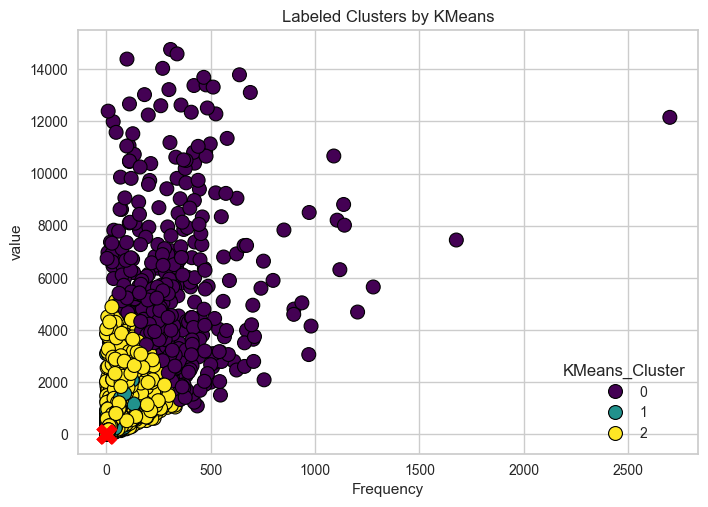

In [190]:
df_rfv['KMeans_Cluster'] = labels

# Plotando os clusters com o Seaborn
scatter_kwargs = {'palette': 'viridis', 's': 100, 'edgecolor': 'black'}  # Customizando a aparência do gráfico

sns.scatterplot(data=df_rfv, x='Frequency', y='value', hue='KMeans_Cluster', **scatter_kwargs)
for centroid in centroids:
    plt.scatter(centroid[1], centroid[2], s=200, c='red', marker='X', label='Centroid')
plt.title('Labeled Clusters by KMeans')
plt.show()

In [191]:
#Fazendo checagem de valores escalados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])  

[[-0.90985949  0.80902136  1.57742904]
 [-0.18075863 -0.40539218  0.23756801]
 [-0.75005656 -0.06760828  0.2164044 ]
 [ 2.16634691 -0.51798681 -0.54245169]
 [-0.57027827  0.02890141  0.61551636]]


In [192]:
# sklearn metrics
silhouette_score(X, labels)
davies_bouldin_score(X, labels)
calinski_harabasz_score(X, labels)

3325.6607957294177

c:\Users\Shiry\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


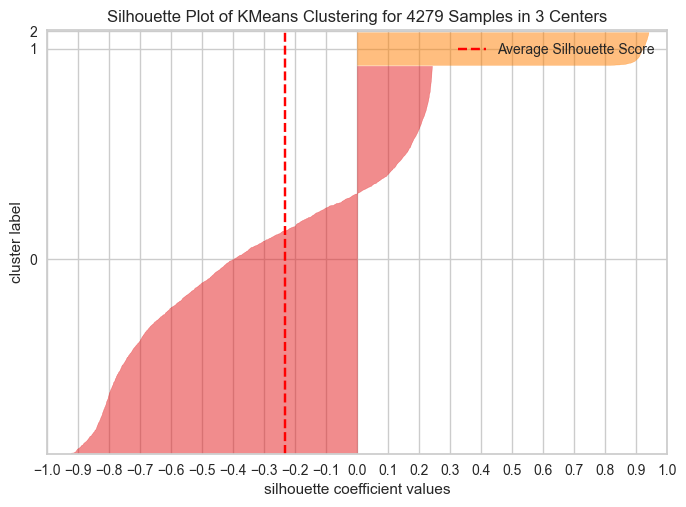

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4279 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [193]:
# silhoute para validar o modelo
visualizer = SilhouetteVisualizer(pipeline_kmeans.named_steps['kmeans']) 
visualizer.fit(X)  
visualizer.show() 


In [194]:

# kelbow_visualizer
KElbowVisualizer(pipeline_kmeans.named_steps['kmeans'], X, k=10, timings=False)
visualizer.fit(X) 
visualizer.show()  # Exibe o gráfico

c:\Users\Shiry\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4279 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

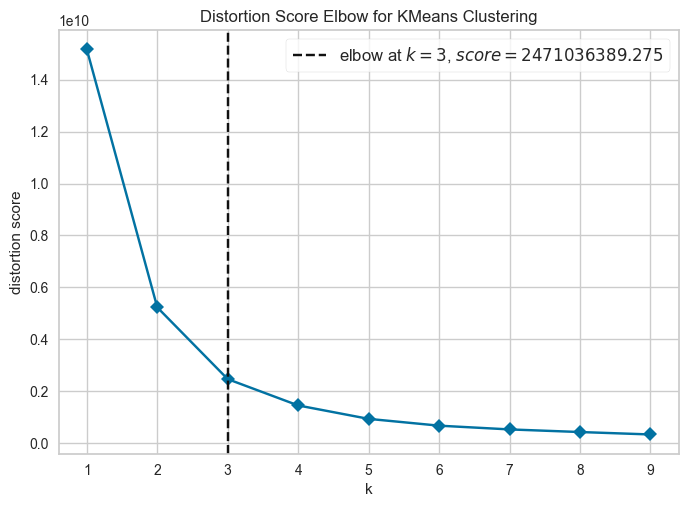

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [195]:
# Definir X explicitamente
X = df_rfv[['recency', 'Frequency', 'value']]

# Pipeline para K-Means
pipeline_kmeans = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normalização dos dados
    ('kmeans', KMeans())  # Algoritmo K-Means
])

# Cria o visualizador do método do cotovelo
visualizer = KElbowVisualizer(pipeline_kmeans.named_steps['kmeans'], k=(1, 10), timings=False)

# Ajusta o visualizador com os dados
visualizer.fit(X)

#gráfico do cotovelo
visualizer.show()


In [196]:

# Create list of dictionaries

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

In [197]:

# Style dataframe
(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k')
  .style.background_gradient(cmap='Oranges', subset='inertia')
  .highlight_max(subset=['silhouette_score','calinski_harabasz_score'])
  .highlight_min(subset='davies_bouldin_score'))

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,5231949558.968478,0.778547,0.522068,8114.848200
3,2471036389.275104,0.702817,0.513388,10977.623542
4,1458402158.120327,0.661796,0.508127,13386.462686
5,934778474.416398,0.608169,0.522099,16258.621512
6,680841011.979297,0.564285,0.539641,18174.069217
7,541933975.385656,0.549412,0.560016,19207.633703
8,426411901.061316,0.515751,0.580458,21080.009215
9,341787941.126252,0.515512,0.572175,23138.644419
10,300532629.398610,0.517080,0.565840,23453.753842


A escolha do K-means com 2 a 3 clusters não foi eficaz na clusterização dos dados, como evidenciado pelo gráfico de silhueta, onde os valores próximos de 0,5 indicam que as amostras estão mais próximas dos clusters vizinhos do que do seu próprio cluster.


Irei passar por mais 2 modelos e depois retorno para o Kmeans para testar a variavel kmeans++

DBSCAN


In [198]:
# Definindo X explicitamente
X = df_rfv[['recency', 'Frequency', 'value']]

# Pipeline para DBSCAN
pipeline_dbscan = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normalização dos dados
    ('dbscan', DBSCAN(eps=
                   1.5,
                     min_samples=10
                     ))  # Algoritmo DBSCAN
])

# Treinamento do DBSCAN
pipeline_dbscan.fit(X)
pipeline_dbscan.named_steps['dbscan'].labels_  # Adiciona os rótulos de cluster ao df


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [199]:
# Obtendo os resultados
dbscan_model = pipeline_dbscan.named_steps['dbscan']  # Acessando o modelo DBSCAN dentro do pipeline

# Labels (rótulos de cluster para cada ponto)
labels = dbscan_model.labels_

# O DBSCAN não tem centroids nem inertia, então vamos apenas mostrar os rótulos
# Adicionando os rótulos de cluster ao DataFrame
df_rfv['DBSCAN_Cluster'] = labels

# Exibindo os resultados
print("\nLabels:\n", labels)





Labels:
 [0 0 0 ... 0 0 0]


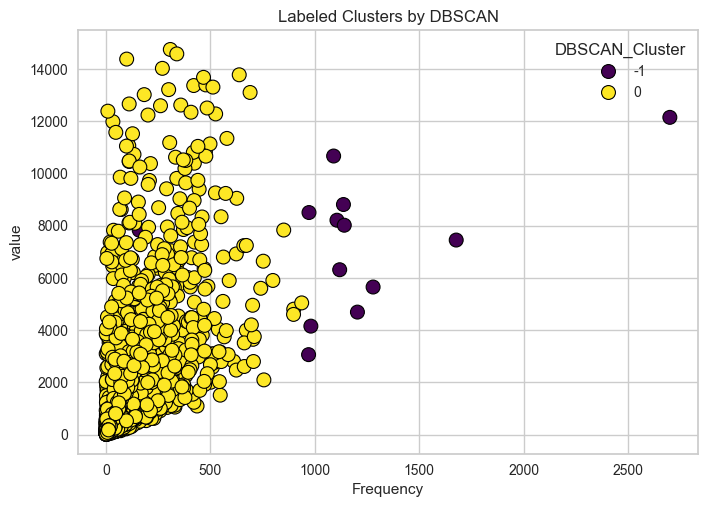

In [200]:
# Plotando os clusters com o Seaborn
scatter_kwargs = {'palette': 'viridis', 's': 100, 'edgecolor': 'black'}  # Customizando a aparência do gráfico

sns.scatterplot(data=df_rfv, x='Frequency', y='value', hue='DBSCAN_Cluster', **scatter_kwargs)
plt.title('Labeled Clusters by DBSCAN')
plt.show()


In [201]:


# Função personalizada para DBSCAN
def custom_dbscan(eps, min_samples):
    # Aplicando o DBSCAN no conjunto de dados
    _, labels = dbscan_model.fit_predict(df_rfv[['recency', 'Frequency', 'value']])
    
    # Plotando os clusters com Seaborn
    sns.scatterplot(data=df_rfv, x='Frequency', y='value', hue=labels, palette='tab10')
    plt.title(f"DBSCAN Clusters (eps={eps}, min_samples={min_samples})")
    plt.show()


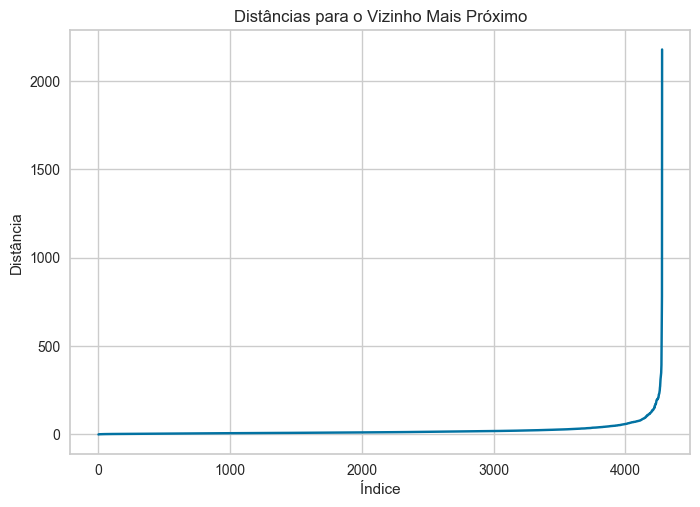

In [202]:
# Definindo X com as colunas de interesse no df_rfm
X = df_rfv[['recency', 'Frequency', 'value']]

# Criando o modelo NearestNeighbors
nn_model = NearestNeighbors(n_neighbors=2).fit(X)

# Obtendo as distâncias e índices dos vizinhos mais próximos
distances, indices = nn_model.kneighbors(X)

# Ordenando as distâncias
distances = np.sort(distances, axis=0)

# Plotando a segunda coluna das distâncias (distâncias do vizinho mais próximo)
plt.plot(distances[:,1])
plt.title('Distâncias para o Vizinho Mais Próximo')
plt.xlabel('Índice')
plt.ylabel('Distância')
plt.show()


O DBSCAN tem uma clusterização pior que a do Kmeans , portanto não escolherei esse modelo , ele sub divide em dois grupos 

In [203]:
# Definindo manualmente o bandwidth
bandwidth = 2.0  # Exemplo de valor

# Definindo o pipeline com o bandwidth manual
pipeline_meanshift = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normalização dos dados
    ('meanshift', MeanShift(bandwidth=bandwidth))  # Algoritmo MeanShift com bandwidth ajustado
])

# Treinamento do modelo
pipeline_meanshift.fit(df_rfv[['Frequency', 'value']])

# Obtendo os rótulos de cluster
labels = pipeline_meanshift.named_steps['meanshift'].labels_
df_rfv['MeanShift_Cluster'] = labels



In [204]:
# Acessando o modelo MeanShift dentro do pipeline
meanshift_model = pipeline_meanshift.named_steps['meanshift']

# Labels (rótulos de cluster para cada ponto)
labels = meanshift_model.labels_

# Adicionando os rótulos de cluster ao DataFrame
df_rfv['MeanShift_Cluster'] = labels


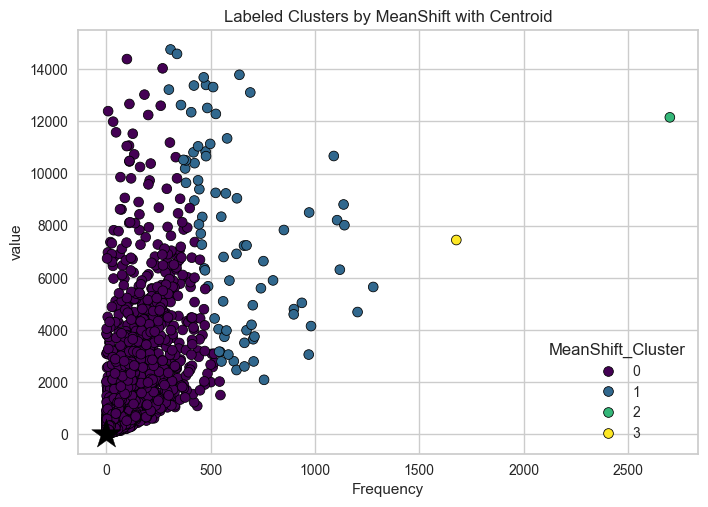

In [205]:
# Customizando a aparência do gráfico
scatter_kwargs = {'palette': 'viridis', 'edgecolor': 'black'}

# Plotando os clusters com o Seaborn
ax = sns.scatterplot(data=df_rfv, x='Frequency', y='value', hue='MeanShift_Cluster', **scatter_kwargs)

# Adicionando o centróide principal ao gráfico
centroid = pipeline_meanshift.named_steps['meanshift'].cluster_centers_
ax.scatter(centroid[0][0], centroid[0][1], marker='*', c='black', s=500)

# Exibindo o gráfico
plt.title('Labeled Clusters by MeanShift with Centroid')
plt.show()




O meanshift tem uma performace um pouco melhor que DBSCAN  mais ainda não fica claro os grupos .

K-MEANS++

In [218]:
#definindo X 
X = df_rfv[['Frequency', 'value']]

# Pipeline para K-Means com KMeans++
pipeline_kmeans = Pipeline(steps=[
    ('scaler', StandardScaler()),  
    ('kmeans', KMeans(n_clusters=3, init='k-means++', n_init=10))  # KMeans com inicialização KMeans++
])


pipeline_kmeans.fit(X)


kmeans_model = pipeline_kmeans.named_steps['kmeans']  

centroids = kmeans_model.cluster_centers_

labels = kmeans_model.labels_


inertia = kmeans_model.inertia_

# Adicionando os rótulos de cluster ao DataFrame
df_rfv['KMeans_Cluster'] = labels


print("Centroids:\n", centroids)
print("\nLabels:\n", labels)
print("\nInertia:", inertia)


Centroids:
 [[-0.34117523 -0.3871736 ]
 [ 0.7878109   0.92650474]
 [ 3.160679    3.43756538]]

Labels:
 [1 0 0 ... 0 2 0]

Inertia: 2863.4455607483847


In [219]:
# Obtendo os rótulos de cluster do KMeans++ (do pipeline)
labels_kmeans_plus = pipeline_kmeans.named_steps['kmeans'].labels_

# Adicionando a coluna 'KMeans++_Cluster' ao DataFrame df_rfm
df_rfv['KMeans++_Cluster'] = labels_kmeans_plus

# Exibindo as primeiras linhas para verificar
df_rfv.head()


,recency,Frequency,value,KMeans_Cluster,DBSCAN_Cluster,MeanShift_Cluster,KMeans++_Cluster
CustomerID,,,,,,,
12347.0,2,182,4310.00,1,0,0,1
12348.0,75,31,1797.24,0,0,0,0
12349.0,18,73,1757.55,0,0,0,0
12350.0,310,17,334.40,0,0,0,0
12352.0,36,85,2506.04,1,0,0,1


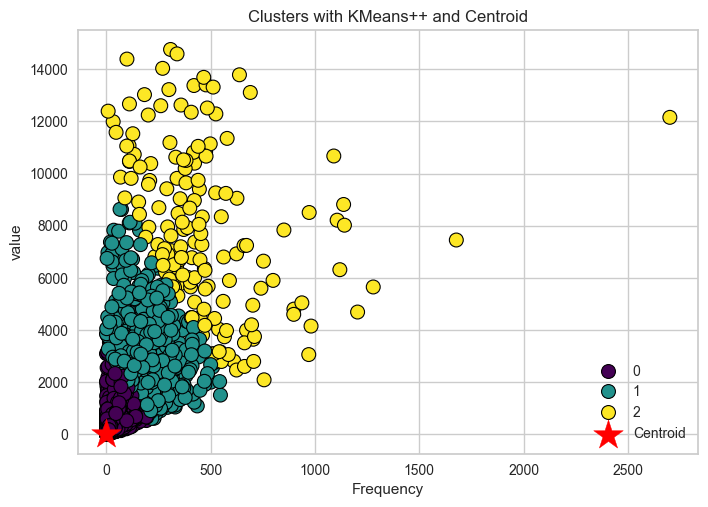

In [221]:


# Plotando os clusters com o Seaborn
scatter_kwargs = {'palette': 'viridis', 's': 100, 'edgecolor': 'black'}

# Gerando o gráfico
ax = sns.scatterplot(data=df_rfv, x='Frequency', y='value', hue='KMeans_Cluster', **scatter_kwargs)

# Marcando o centroid principal
centroid = kmeans_model.cluster_centers_[0]  # Primeiro centroide
ax.scatter(*centroid, marker='*', c='red', s=500, label='Centroid')

# Exibindo o título e o gráfico
plt.title('Clusters with KMeans++ and Centroid')
plt.legend()
graph =ax
plt.show()


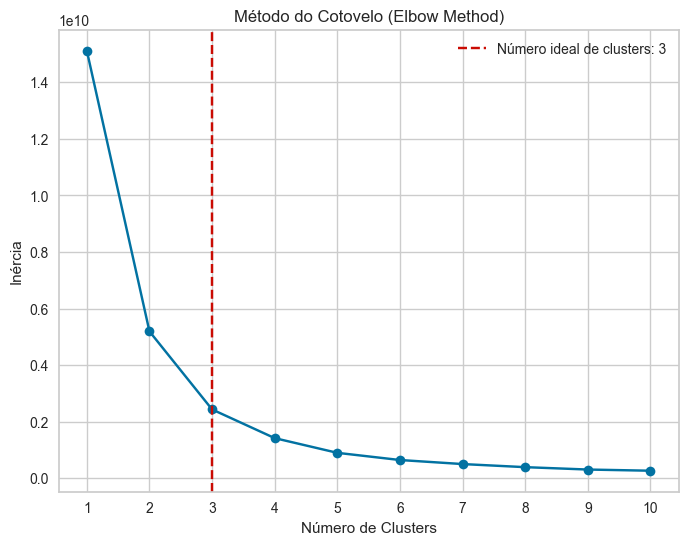

In [222]:
# Definindo o número de clusters para testar
inertia_values = []
k_range = range(1, 11)  

# Calculando a inércia para cada número de clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_rfv[['Frequency', 'value']])  # Usando as variáveis para clusterização
    inertia_values.append(kmeans.inertia_)

# Plotando o gráfico de cotovelo
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.xticks(k_range)

# Identificando o "melhor" número de clusters (ponto de inflexão)
best_k = 3  # Exemplo: número de clusters que você escolheu com base na análise do gráfico
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Número ideal de clusters: {best_k}')

plt.legend()
plt.grid(True)
plt.show()



In [223]:
sil_score = silhouette_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)

# Exibindo os resultados de outras metricas
print(f"Silhouette Score: {sil_score}")
print(f"Davies-Bouldin Score: {davies_bouldin}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")



Silhouette Score: 0.6367840620300016
Davies-Bouldin Score: 0.7261769136530076
Calinski-Harabasz Score: 5935.27342967942


In [224]:
df_rfv_tratado =df_rfv.drop(columns=['DBSCAN_Cluster','MeanShift_Cluster','KMeans_Cluster'])

O modelo escolho é o K-means++ além de clusterizar melhor que os outro modelos sitado acima da pra fazer uma divisão perfeitas  de rfm.


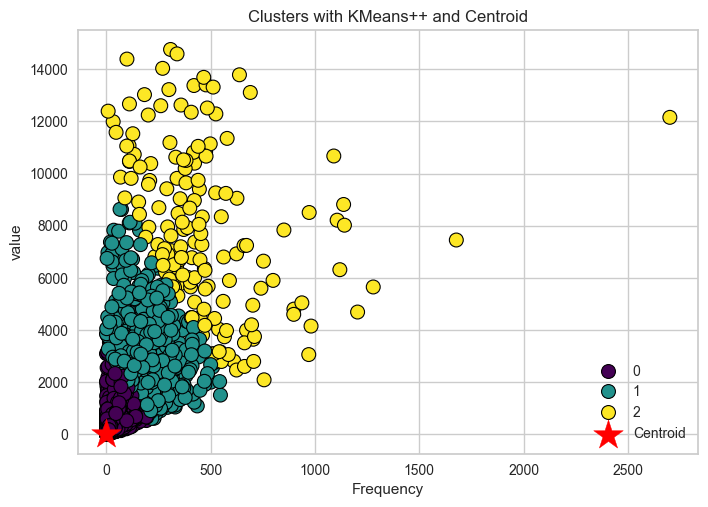

In [225]:

scatter_kwargs = {'palette': 'viridis', 's': 100, 'edgecolor': 'black'}


ax = sns.scatterplot(data=df_rfv, x='Frequency', y='value', hue='KMeans_Cluster', **scatter_kwargs)


centroid = kmeans_model.cluster_centers_[0]  
ax.scatter(*centroid, marker='*', c='red', s=500, label='Centroid')


plt.title('Clusters with KMeans++ and Centroid')
plt.legend()
graph =ax
plt.show()

Podemos adotar 3 tipos diferentes de  abordagens para estes clientes

Para o cluster  0 - roxo -  podemos fazer uma campanha de incentivo de compras ,campanhas de email para ofertas especiaise tentar reengajar estes clientes .

para o cluste 1  verde  -  podemos fazer uma campanha de  fidelização com programas de recompensa e continuidade de compras e usar este dados de compras anteriores para recomendar produtos que são relevantes para esses clientes . 

para o cluster 2 amarelo -  podemos criar um programa vip de beneficios excluisivos e acesso antecipado a produtos e eventos especiais, ofertas exclusivas  e um sistema de engajamento e promoções para manter esses clientes leais

podemos identificar os clientes atraves do CustomerID e assim começar a campanha 

In [226]:
df_rfv_tratado.head()

,recency,Frequency,value,KMeans++_Cluster
CustomerID,,,,
12347.0,2,182,4310.00,1
12348.0,75,31,1797.24,0
12349.0,18,73,1757.55,0
12350.0,310,17,334.40,0
12352.0,36,85,2506.04,1
